In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
filename = 'modified_imports-85.csv'

In [9]:
df = pd.read_csv(filename)
print("Done")

Done


In [4]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,0,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,122,0,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,122,0,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164,1,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164,1,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


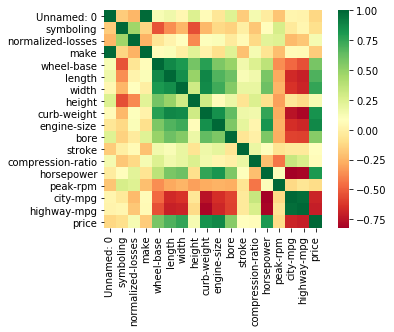

In [10]:
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

# Linear Regression

In [11]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()

In [16]:
X = df['highway-mpg'].values
Y = df['price'].values


# Reshape X and y
Y = Y.reshape(-1, 1)
X = X.reshape(-1, 1)

In [18]:
#Fit the linear model using highway-mpg.
lm.fit(X,Y)

LinearRegression()

In [19]:
Yhat=lm.predict(X)

In [20]:
#What is the value of the Slope (b) ?
lm.coef_

array([[-821.73337832]])

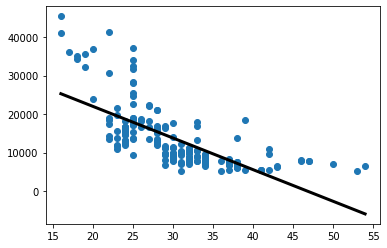

In [22]:
# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
# Compute predictions over the prediction space: y_pred
y_pred = lm.predict(prediction_space)
# Plot regression line
plt.scatter(X,Y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

# Multiple Linear Regression

In [20]:
#Let's develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [21]:
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lm.intercept_

-15824.038208234462

In [23]:
lmm.coef_

array([53.61042729,  4.70886444, 81.47225667, 36.39637823])

# 2) Model Evaluation using Visualization

In [30]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

Regression Plot:
This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

(0, 48177.718896310216)

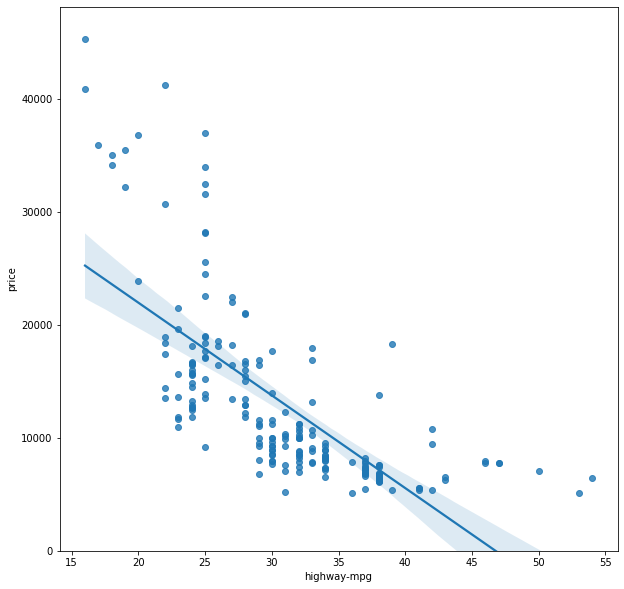

In [31]:
width = 10
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47414.10667770421)

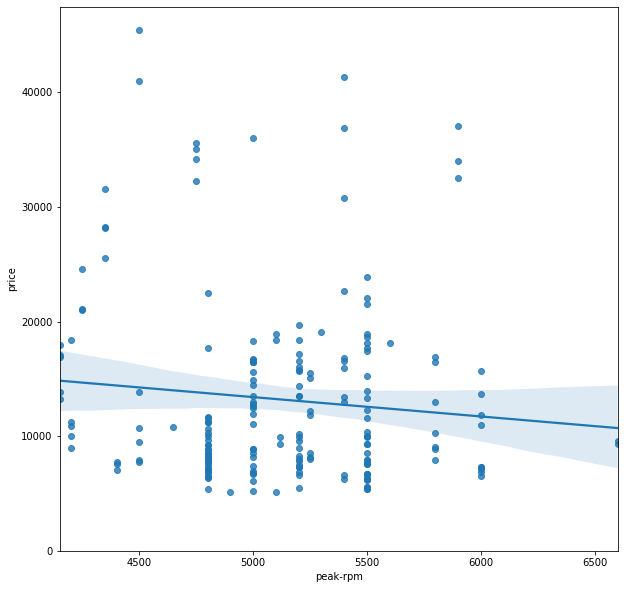

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [26]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [27]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


Residual Plot:
A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

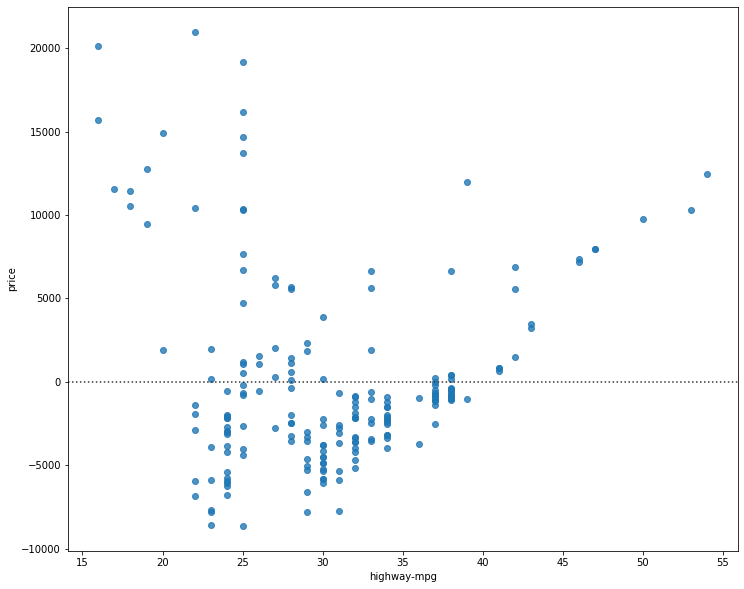

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

 Distribution plot:(multiple reggression)

Text(0, 0.5, 'Proportion of Cars')

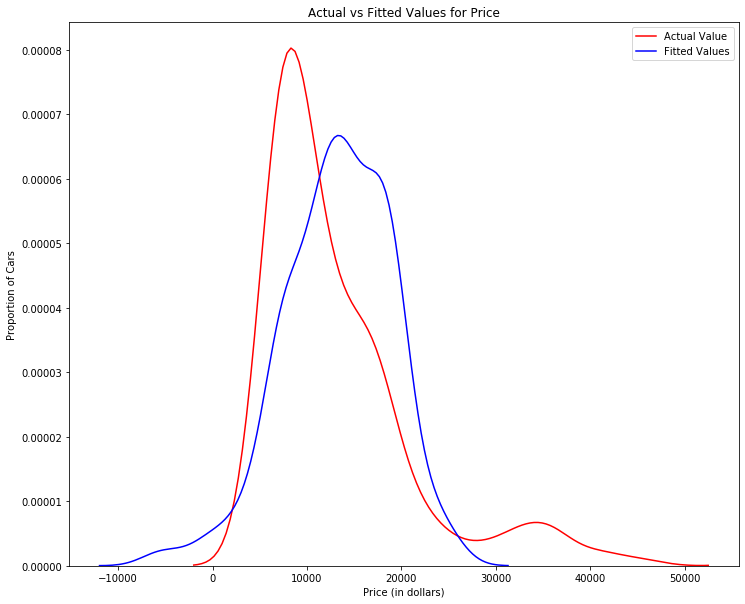

In [29]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

#plt.show()
#plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

# Polynomial Regression and Pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models. We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [22]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    
print("done")

done


In [19]:
x = df['highway-mpg']
y = df['price']
print("done")

done


In [24]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


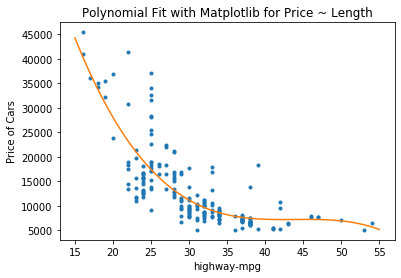

In [47]:
PlotPolly(p,x,y, 'highway-mpg')

In [41]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

We create a PolynomialFeatures object of degree 2:

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [7]:
pr=PolynomialFeatures(degree=2,include_bias=False)
pr

PolynomialFeatures(include_bias=False)

In [8]:
Z_pr=pr.fit_transform(Z)

In [9]:
Z.shape

(201, 4)

In [10]:
Z_pr.shape

(201, 14)

In [11]:
print("Entries of Z:\n{}".format(Z[:5]))
print("Entries of Z_poly:\n{}".format(Z_pr[:5]))

Entries of Z:
   horsepower  curb-weight  engine-size  highway-mpg
0       111.0         2548          130           27
1       111.0         2548          130           27
2       154.0         2823          152           26
3       102.0         2337          109           30
4       115.0         2824          136           22
Entries of Z_poly:
[[1.110000e+02 2.548000e+03 1.300000e+02 2.700000e+01 1.232100e+04
  2.828280e+05 1.443000e+04 2.997000e+03 6.492304e+06 3.312400e+05
  6.879600e+04 1.690000e+04 3.510000e+03 7.290000e+02]
 [1.110000e+02 2.548000e+03 1.300000e+02 2.700000e+01 1.232100e+04
  2.828280e+05 1.443000e+04 2.997000e+03 6.492304e+06 3.312400e+05
  6.879600e+04 1.690000e+04 3.510000e+03 7.290000e+02]
 [1.540000e+02 2.823000e+03 1.520000e+02 2.600000e+01 2.371600e+04
  4.347420e+05 2.340800e+04 4.004000e+03 7.969329e+06 4.290960e+05
  7.339800e+04 2.310400e+04 3.952000e+03 6.760000e+02]
 [1.020000e+02 2.337000e+03 1.090000e+02 3.000000e+01 1.040400e+04
  2.383740e+05 

In [12]:
print("Polynomial feature names:\n{}".format(pr.get_feature_names()))

Polynomial feature names:
['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']


# new sample

In [23]:
X1 = df['highway-mpg']
y1 = df['price']

In [28]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2,include_bias=False)
X_poly = pr.fit_transform(X1.values.reshape(1,-1))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 201 is different from 1)

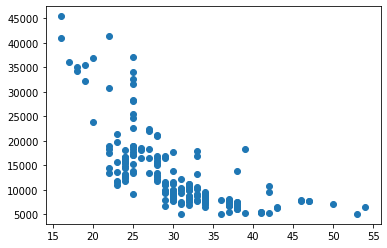

In [33]:
#??????????????????
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X = df['highway-mpg'].values.reshape(1,-1)
y = df['price'].values.reshape(1,-1)

#line =  np.linspace(15, 55, 100,endpoint=False).reshape(-1, 1)
line = np.linspace(min(X), max(X)).reshape(-1,1)

#reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
#plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.scatter(X,Y)
plt.plot(line, reg.predict(line), label="linear regression")

#plt.plot(X, y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

#prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
# Compute predictions over the prediction space: y_pred
#y_pred = lm.predict(prediction_space)
# Plot regression line
#plt.scatter(X,Y)
#plt.plot(prediction_space, y_pred, color='black', linewidth=3)
#plt.show()

# Validation in Practice: Grid Search

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()

In [37]:
X = iris.data
y = iris.target

In [38]:
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [39]:
 from sklearn.model_selection import  GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [52]:
X = df['highway-mpg']
y = df['price']
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]


In [53]:
grid.fit(X, y)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\admin\anaconda

ValueError: Expected 2D array, got 1D array instead:
array=[27 27 26 30 22 25 25 25 20 29 29 28 28 25 22 22 20 53 43 43 41 38 30 38
 38 38 30 30 24 54 38 42 34 34 34 34 33 33 33 33 28 31 29 29 19 19 17 31
 38 38 38 38 23 23 23 23 32 32 32 32 42 32 27 39 25 25 25 25 18 18 16 16
 24 41 38 38 30 30 32 24 24 24 32 32 30 30 37 50 37 37 37 37 37 37 37 37
 34 34 22 22 25 25 23 25 24 33 24 25 24 33 24 25 24 33 24 41 30 38 38 38
 30 24 27 25 25 25 31 31 28 28 28 28 26 26 36 31 31 37 33 32 25 29 32 31
 29 23 39 38 38 37 32 32 37 37 36 47 47 34 34 34 34 29 29 30 30 30 30 30
 30 34 33 32 32 32 24 24 24 24 46 34 46 34 34 42 32 29 29 24 38 31 28 28
 28 28 22 22 28 25 23 27 25].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 0}

# Pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [56]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [57]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [58]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13103.37745014, 13103.37745014, 18228.50045451, 10392.95563313])

# Part 4: Measures for In-Sample Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [ ]:
Model 1: Simple Linear Regression

In [10]:
#R^2
#highway_mpg_fit
#lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.4965911884339176

In [11]:
#MSE
Yhat=lm.predict(X)
Yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
#mean_squared_error(Y_true, Y_predict)
mean_squared_error(df['price'], Yhat)

31635042.944639888

In [ ]:
Model 2: Multiple Linear Regression

In [16]:
#R^2
# fit the model 
#lm.fit(Z, df['price'])
# Find the R^2
lm.score(Z, df['price'])

0.8094130135602673

In [17]:
#calculate the MSE
Y_predict_multifit = lm.predict(Z)

In [18]:
mean_squared_error(df['price'], Y_predict_multifit)

11976801.681229586

In [ ]:
Model 3: Polynomial Fit

In [19]:
#R^2
#let’s import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score

In [26]:
r2_score(y, p(x))

0.674194666390652

In [27]:
#MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

In [ ]:
#RMSE
rmse = np.sqrt(mean_squared_error(df['price'], p(x)))
print("Root Mean Squared Error: {}".format(rmse))

# Part 5: Prediction

In [30]:
#Create a new input
new_input=np.arange(1,100,1).reshape(-1,1)

In [31]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

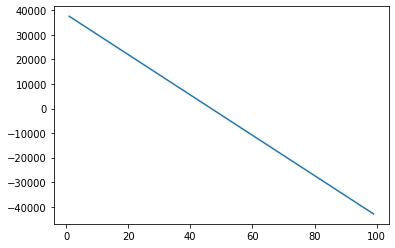

In [33]:
plt.plot(new_input,yhat)
plt.show()

# Decision Making: Determining a Good Model Fit

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.